In [62]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [2]:
f = "user_behavior_dataset.csv"
df = pd.read_csv(f, low_memory=False)

In [3]:
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [4]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [5]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

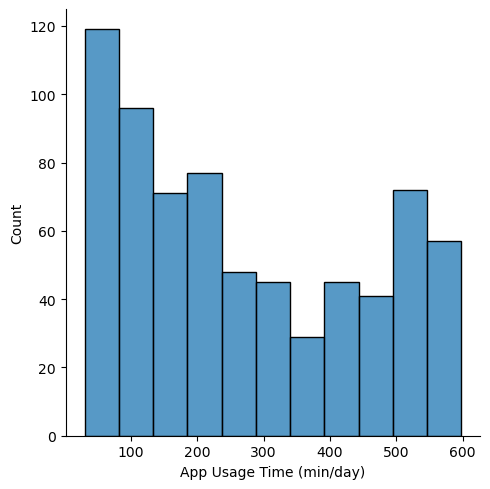

In [6]:
sns.displot(data=df['App Usage Time (min/day)'])
plt.show()

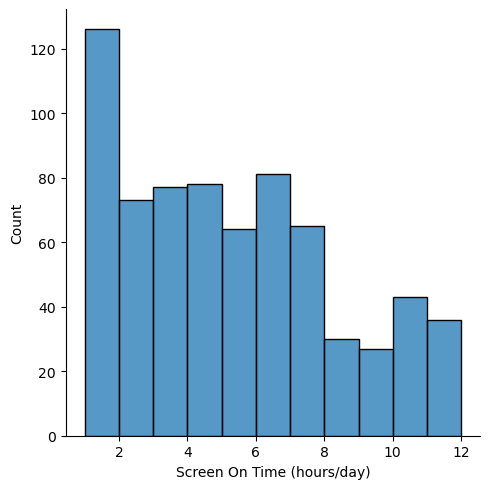

In [7]:
sns.displot(data=df['Screen On Time (hours/day)'])
plt.show()

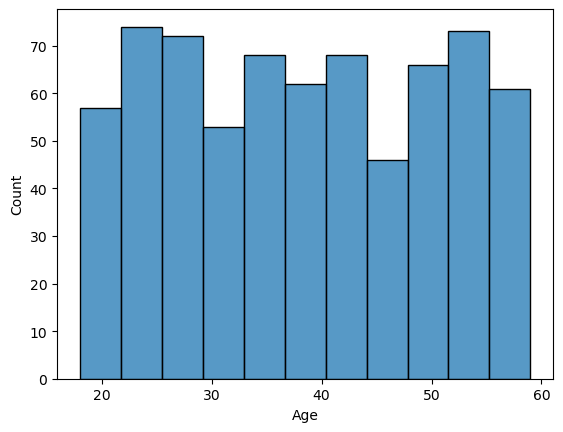

In [34]:
sns.histplot(data=df['Age'])
plt.show()

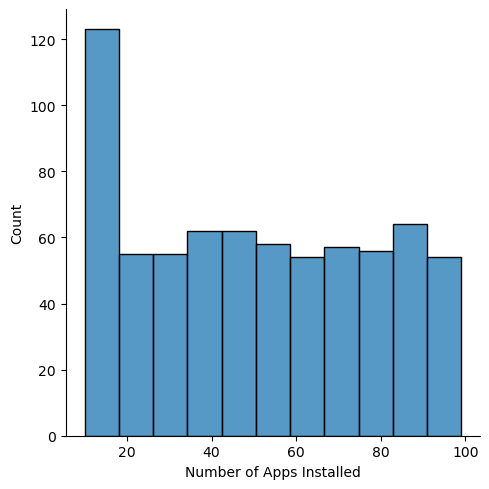

In [9]:
sns.displot(data=df['Number of Apps Installed'])

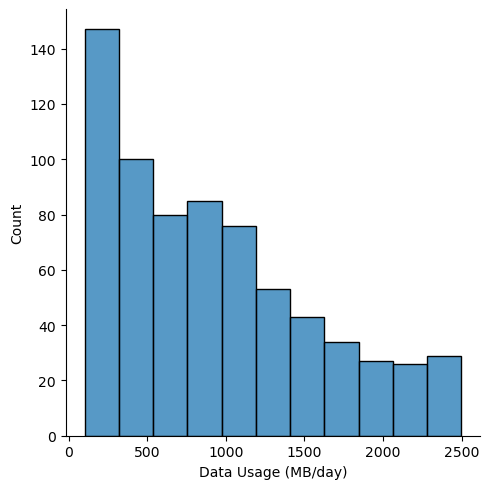

In [10]:
sns.displot(data=df['Data Usage (MB/day)'])

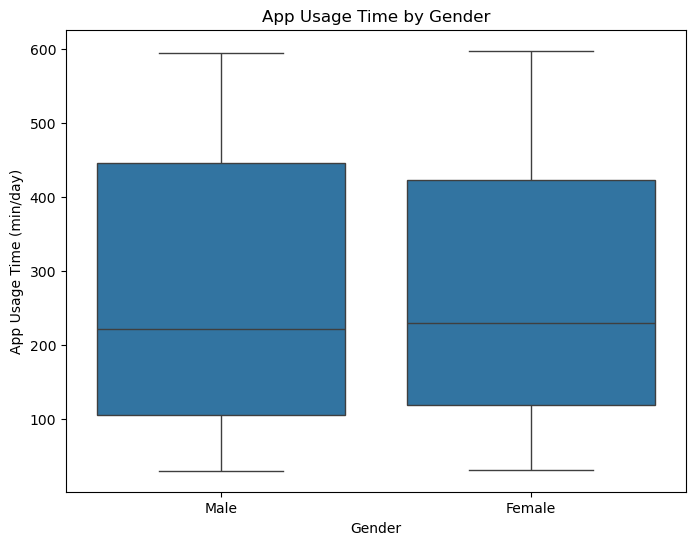

In [11]:
# App Usage Time by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='App Usage Time (min/day)')
plt.title('App Usage Time by Gender')
plt.xlabel('Gender')
plt.ylabel('App Usage Time (min/day)')
plt.show()

In [12]:
# Bins for the Age column
bins = [18, 29, 39, 49, 59]
df['Age Group'] = pd.cut(df['Age'], bins=bins)
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Age Group
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,"(39, 49]"
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,"(39, 49]"
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2,"(39, 49]"
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3,"(18, 29]"
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,"(29, 39]"
...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2,"(18, 29]"
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4,"(49, 59]"
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2,"(49, 59]"
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1,"(39, 49]"


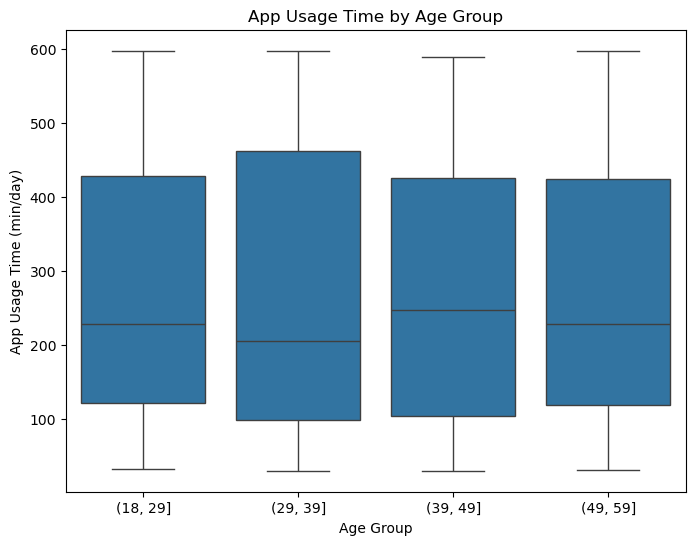

In [13]:
# App Usage Time by Age

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Age Group', y='App Usage Time (min/day)')
plt.title('App Usage Time by Age Group')
plt.xlabel('Age Group')
plt.ylabel('App Usage Time (min/day)')
plt.show()

## Which apps have the longest usage time?


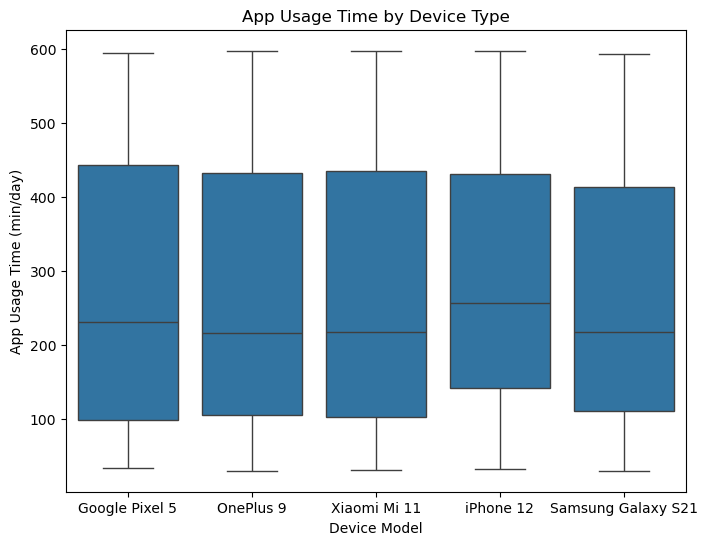

In [15]:
# App Usage Time by Device

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Device Model', y='App Usage Time (min/day)')
plt.title('App Usage Time by Device Type')
plt.xlabel('Device Model')
plt.ylabel('App Usage Time (min/day)')
plt.show()

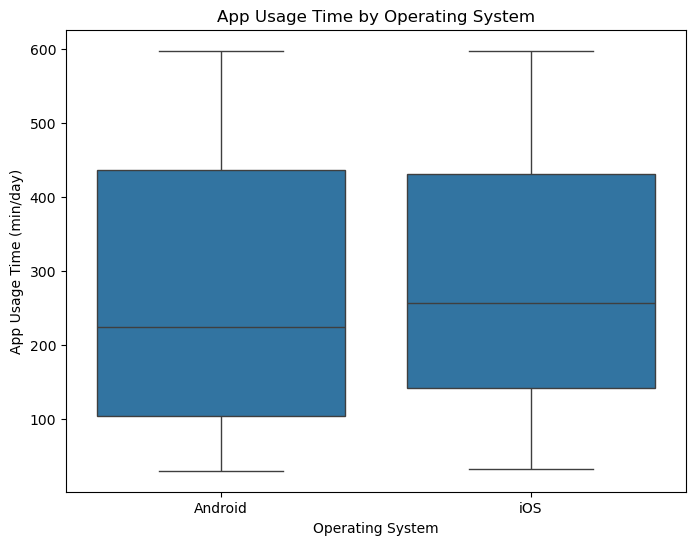

In [16]:
# App Usage Time by Operating System

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Operating System', y='App Usage Time (min/day)')
plt.title('App Usage Time by Operating System')
plt.xlabel('Operating System')
plt.ylabel('App Usage Time (min/day)')
plt.show()

In [52]:
# Set Features and Target
X = df.drop(columns=['App Usage Time (min/day)', 'Age Group'])
y = df['App Usage Time (min/day)']

categorical_features = ['Device Model', 'Operating System', 'Gender']
numerical_features = ['Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 
                      'Number of Apps Installed', 'Data Usage (MB/day)']

#Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features), 
    ('cat', OneHotEncoder(), categorical_features)
])
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Linear Regression Model
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train and evaluate
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

# Print Results
print('Linear Regression Results')
print(f'MSE: {mean_squared_error(y_test, y_pred_lr)}')
print(f'R^2: {r2_score(y_test, y_pred_lr)}')

Linear Regression Results
MSE: 1885.189338035279
R^2: 0.9312093987635787


In [58]:
# Random Forest Model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Train and evaluate
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print('Random Forest Results:')
print(f'MSE: {mean_squared_error(y_test, y_pred_rf)}')
print(f'R^2: {r2_score(y_test, y_pred_rf)}')

Random Forest Results:
MSE: 1231.0872942857143
R^2: 0.9550775970138398


In [66]:
# XGBoost Model
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42))
])

# Train and evaluate
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

print('XGBoost Results:')
print(f'MSE {mean_squared_error(y_test, y_pred_xgb)}')
print(f'R^2: {r2_score(y_test, y_pred_xgb)}')

XGBoost Results:
MSE 1452.941171127899
R^2: 0.9469821440708955
